# Instaquery

In this notebook, we'll define an `instaquery()` function that lets you:

1. define a renderer (plot, table, print, etc.)
2. filter the data using `pandas.query` syntax
3. specify a column to group-by

This tiny function can be handy for quick, throwaway exploration that you do not want captured permanently in the notebook (e.g., exploration off the primary track).

In [1]:
%matplotlib inline

In [105]:
from IPython.display import display, Image
from IPython.html.widgets import interact_manual

In [78]:
def instaquery(df, renderer=lambda df, by: display(df)):
    '''
    Creates an interactive query widget with an optional custom renderer.
    
    df: DataFrame to query
    renderer: Render function of the form lambda df, by where df is the subset of the DataFrame rows
        matching the query and by is the column selected for a group-by option. The default render
        function simply displays the rows matching the query and ignores the group-by.
    '''
    by_vals = tuple(['---'] + list(df.columns))

    @interact_manual(query='', by=by_vals)
    def instaquery(query, by):
        '''Inner function that gets called when the user interacts with the widgets.'''
        try:
            sub_df = df.query(query)
        except Exception:
            sub_df = df
        # replace sentinel with None
        by = None if by == '---' else by
        renderer(sub_df, by)

It doesn't look like much, but hers's a screenshot of just one thing it can do.

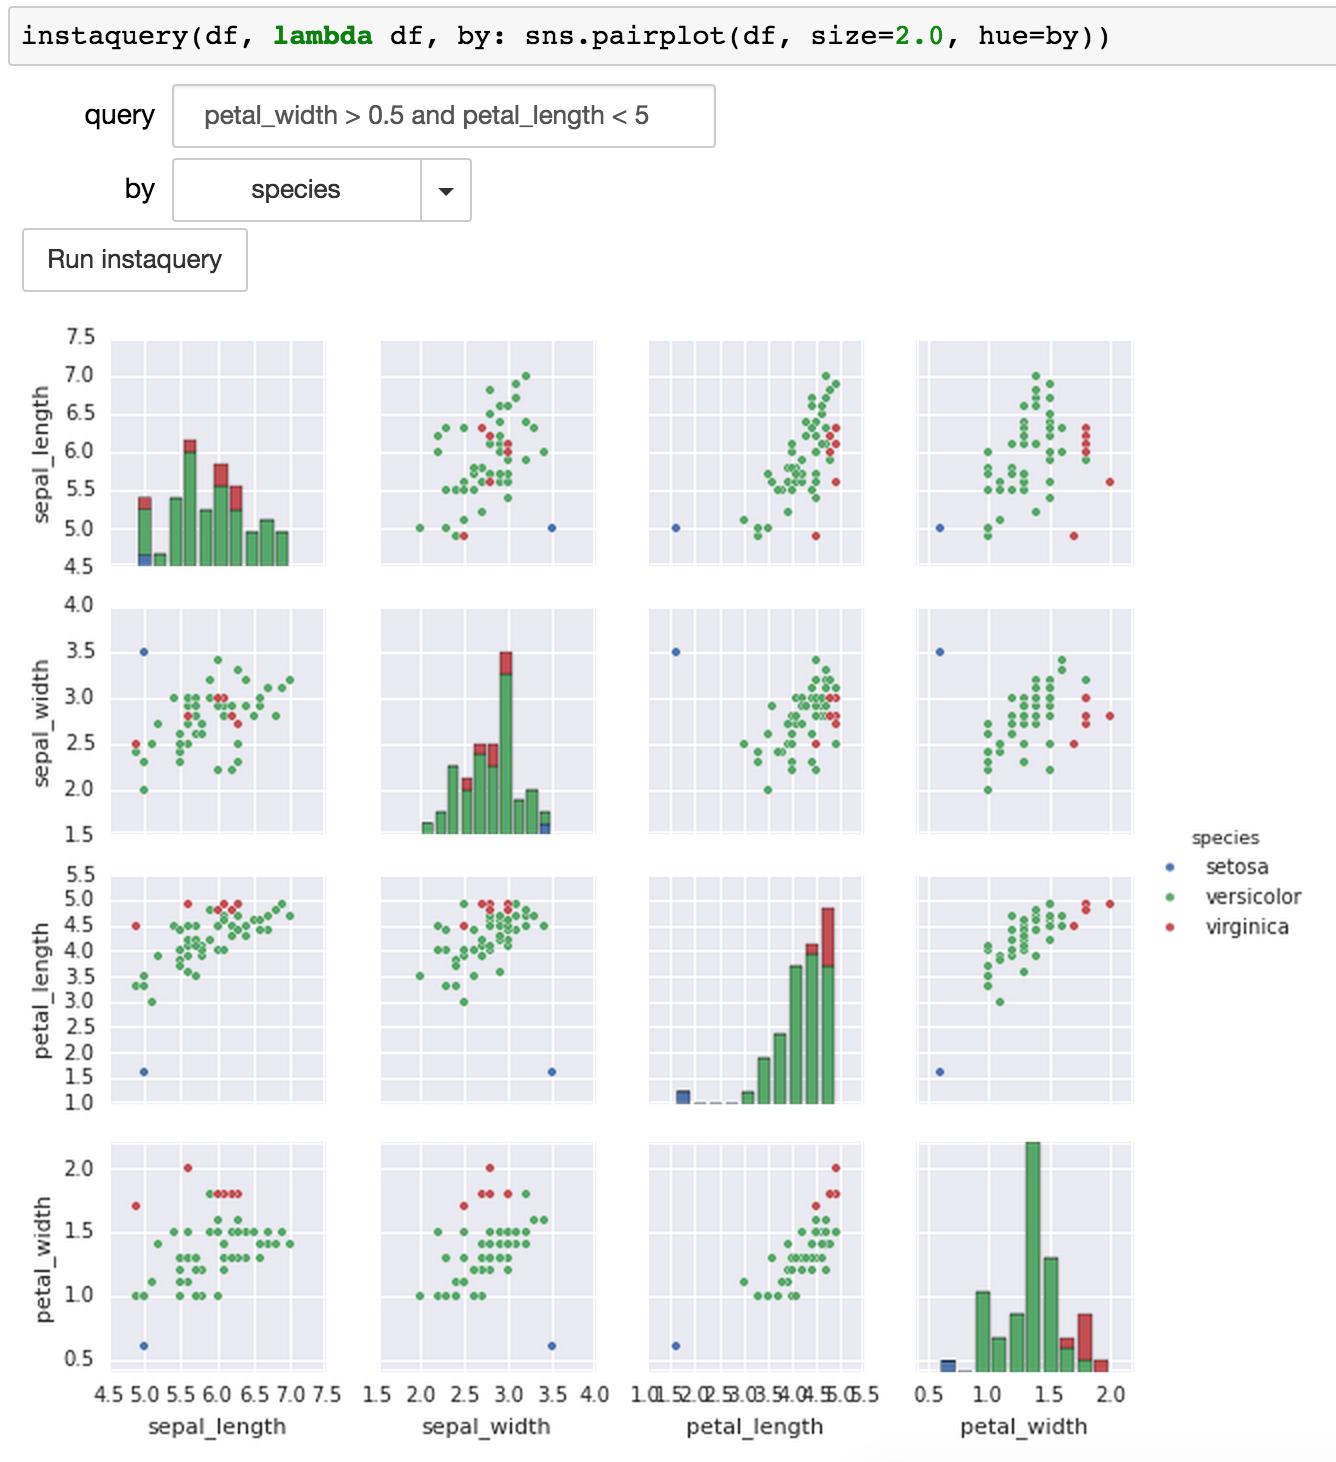

In [107]:
Image('./instaquery.png', retina=True, )

## Example #1: Pair Plot of Iris Data

Let's use it to render seaborn pairplots for the class iris dataset first.

In [97]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns

In [98]:
df = sns.load_dataset('iris')

In [99]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We initialize the instaquery with the iris DataFrame and a custom render function. In our function, we render plots of all pairwise column combinations. We color points / bars by a selected column.

1. Run the cell below. Then hit *Run instaquery*. You should see the pairwise plots for the full dataset.
2. Next, select `species` in the *by* dropdown and click *Run instaquery* again. You still see the full dataset, but with each feature vector color coded according to its `species` category. 
4. Finally, enter the query string `petal_width > 0.5 and petal_length < 5` and click *Run instaquery*. Now you only see the data that fall within the query parameters colorized according to species.

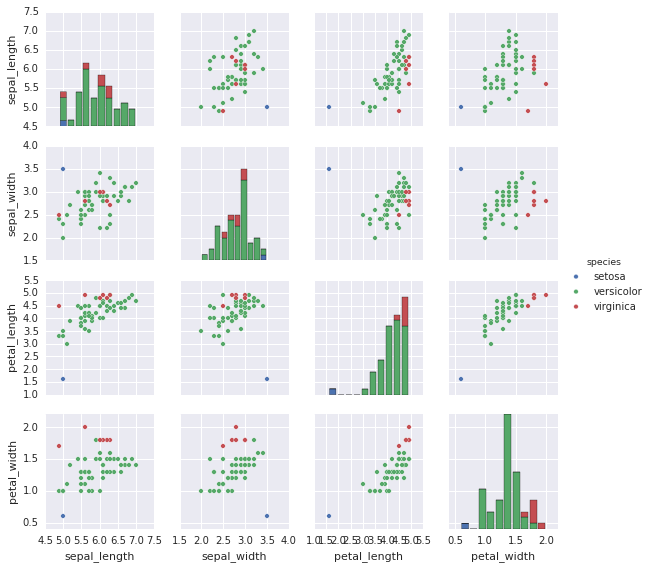

In [104]:
instaquery(df, lambda df, by: sns.pairplot(df, size=2.5, hue=by))

## Example #2: Pair Plot of Select Tip Columns

Now let's switch to another dataset, but and customize the pairwise plots a bit.

In [109]:
df = sns.load_dataset('tips')

In this dataset, not all columns have numeric values. Since we're interested in using `pairplot`, we need to filter out some columns from our pairings. But, at the same time, we gain more categorical columns to use for grouping.

In [111]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In this invocation of `instaquery`, we pass a fixed list of columns of interest for ploitting. We also specify the plot fill opacity since our data is denser than in the iris dataset.

1. Try coloring by `sex`, `day`, `smoker`, etc.
2. When coloring by `day`, try the query `total_bill * 0.15 < tip`. This plots customer tips greater than 15% of the total bill amount colored by day.

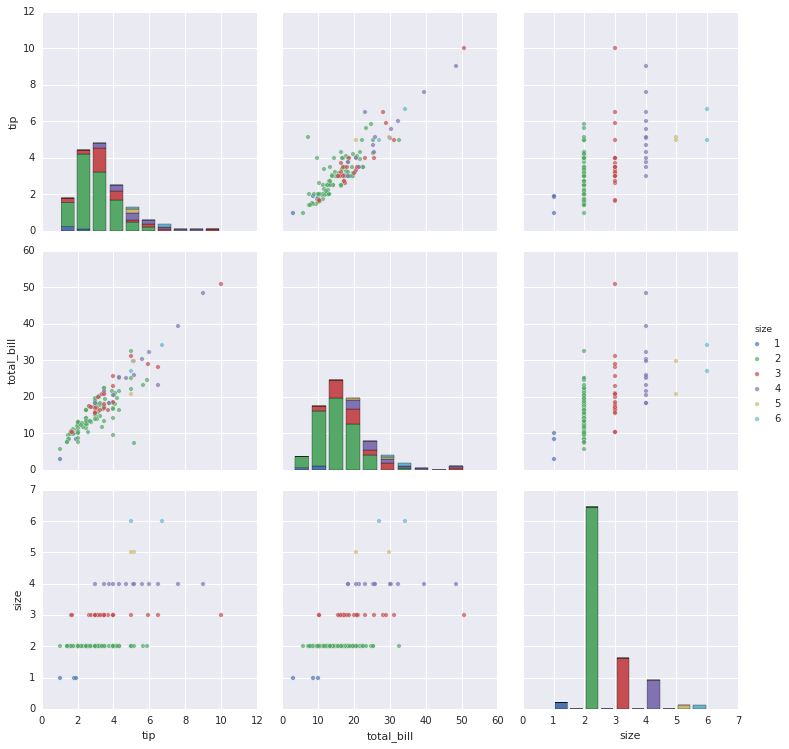

In [113]:
instaquery(df, lambda df, by: sns.pairplot(df, vars=['tip', 'total_bill', 'size'], size=3.5, hue=by, plot_kws={'alpha' : 0.7}))

## Example #3: Description of Tip Groups

As a final example, we cease plotting and use a different renderer: a pandas table giving the basic summary stats of all numeric columns, optionally grouped by a column.

1. Try *Run instaquery* with no values first.
2. Try grouping by `sex`.
3. Try grouping by `sex` with the query `time == 'Lunch'`.

In [115]:
instaquery(df, lambda df, by: display(df.groupby(by).describe()) if by else display(df.describe()))

size        tip  total_bill
sex                                           
Female count  35.000000  35.000000   35.000000
       mean    2.457143   2.582857   16.339143
       std     1.093910   1.075108    7.500803
       min     1.000000   1.250000    8.350000
       25%     2.000000   1.915000   12.065000
       50%     2.000000   2.010000   13.420000
       75%     2.000000   3.115000   17.865000
       max     6.000000   5.170000   43.110000
Male   count  33.000000  33.000000   33.000000
       mean    2.363636   2.882121   18.048485
       std     0.994302   1.329017    7.953435
       min     1.000000   1.440000    7.510000
       25%     2.000000   2.000000   13.030000
       50%     2.000000   2.310000   16.580000
       75%     2.000000   4.000000   21.160000
       max     6.000000   6.700000   41.190000

## Homework: Violin Plot Renderer

Try to implement a violin plot renderer that compares the distribution of tips grouped by a column of choice. Here's a hint in the form of a static violin plot.

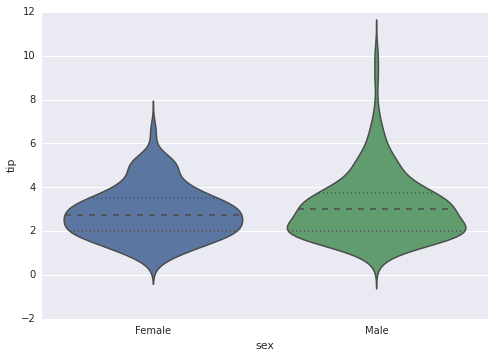

In [126]:
sns.violinplot(df.tip, df.sex)

<div class="alert" style="border: 1px solid #aaa; background: radial-gradient(ellipse at center, #ffffff 50%, #eee 100%);">
<div class="row">
    <div class="col-sm-1"><img src="https://knowledgeanyhow.org/static/images/favicon_32x32.png" style="margin-top: -6px"/></div>
    <div class="col-sm-11">This notebook was created using <a href="https://knowledgeanyhow.org">IBM Knowledge Anyhow Workbench</a>.  To learn more, visit us at <a href="https://knowledgeanyhow.org">https://knowledgeanyhow.org</a>.</div>
    </div>
</div>